In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

df = pd.read_csv('shopping_behavior.csv')
print("Размер датасета:", df.shape)

# Установим стиль графиков
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

Размер датасета: (3900, 18)


In [25]:
print("\nПервые 5 строк:")
df.head()


Первые 5 строк:


Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

   Shipping Type Discount Applied Promo Code Used  Previous Purchases  \
0        Express              Yes             Yes                  14   
1        Express              Yes             Yes                   2   
2  Free Shipping              Yes             Yes                  23   
3   Next Day Air              Yes             Yes                  49   
4  Free Shipping              Yes             Yes                  31   

  Payment Method Frequency of Purchases  
0          Venmo            Fortnightly  
1           Cash            Fortnightly  
2    Credit Card                 Weekly  
3         PayPal                 Weekly  
4         PayPal               Annually

In [26]:
print("Последние 5 строк:")
df.tail()

Последние 5 строк:


Customer ID  Age  Gender Item Purchased     Category  \
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)    Location Size      Color  Season  \
3895                     28    Virginia    L  Turquoise  Summer   
3896                     49        Iowa    L      White  Spring   
3897                     33  New Jersey    L      Green  Spring   
3898                     77   Minnesota    S      Brown  Summer   
3899                     81  California    M      Beige  Spring   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
3895            4.2                  No  2-Day Shipping               No   
3896            4.5                  No    Store Pickup               No   
3897            2.9                  No        Standard               No   
3898            3.8                  No         Express               No   
3899            3.1                  No    Store Pickup               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
3895              No                  32          Venmo                 Weekly  
3896              No                  41  Bank Transfer              Bi-Weekly  
3897              No                  24          Venmo              Quarterly  
3898              No                  24          Venmo                 Weekly  
3899              No                  33          Venmo              Quarterly

In [27]:
print("Информация о датасете:")
print(df.info())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used  

In [28]:
print("Описательная статистика числовых столбцов:")
df.describe()

Описательная статистика числовых столбцов:


Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [29]:
print("Статистика для категориальных столбцов:")
df.describe(include=['object'])

Статистика для категориальных столбцов:


Gender Item Purchased  Category Location  Size  Color  Season  \
count    3900           3900      3900     3900  3900   3900    3900   
unique      2             25         4       50     4     25       4   
top      Male         Blouse  Clothing  Montana     M  Olive  Spring   
freq     2652            171      1737       96  1755    177     999   

       Subscription Status  Shipping Type Discount Applied Promo Code Used  \
count                 3900           3900             3900            3900   
unique                   2              6                2               2   
top                     No  Free Shipping               No              No   
freq                  2847            675             2223            2223   

       Payment Method Frequency of Purchases  
count            3900                   3900  
unique              6                      7  
top            PayPal         Every 3 Months  
freq              677                    584

In [30]:
print("Пропущенные значения:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percentage
})
missing_df[missing_df['Количество пропусков'] > 0]

Пропущенные значения:


Empty DataFrame
Columns: [Количество пропусков, Процент пропусков]
Index: []

In [31]:
duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов строк: {duplicates}")

Количество полных дубликатов строк: 0


In [32]:
customer_duplicates = df['Customer ID'].duplicated().sum()
print(f"Количество дубликатов Customer ID: {customer_duplicates}")

Количество дубликатов Customer ID: 0


In [33]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Числовые столбцы:", list(numeric_cols))

Числовые столбцы: ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']


Числовые столбцы: ['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
Выбросы по методу IQR:


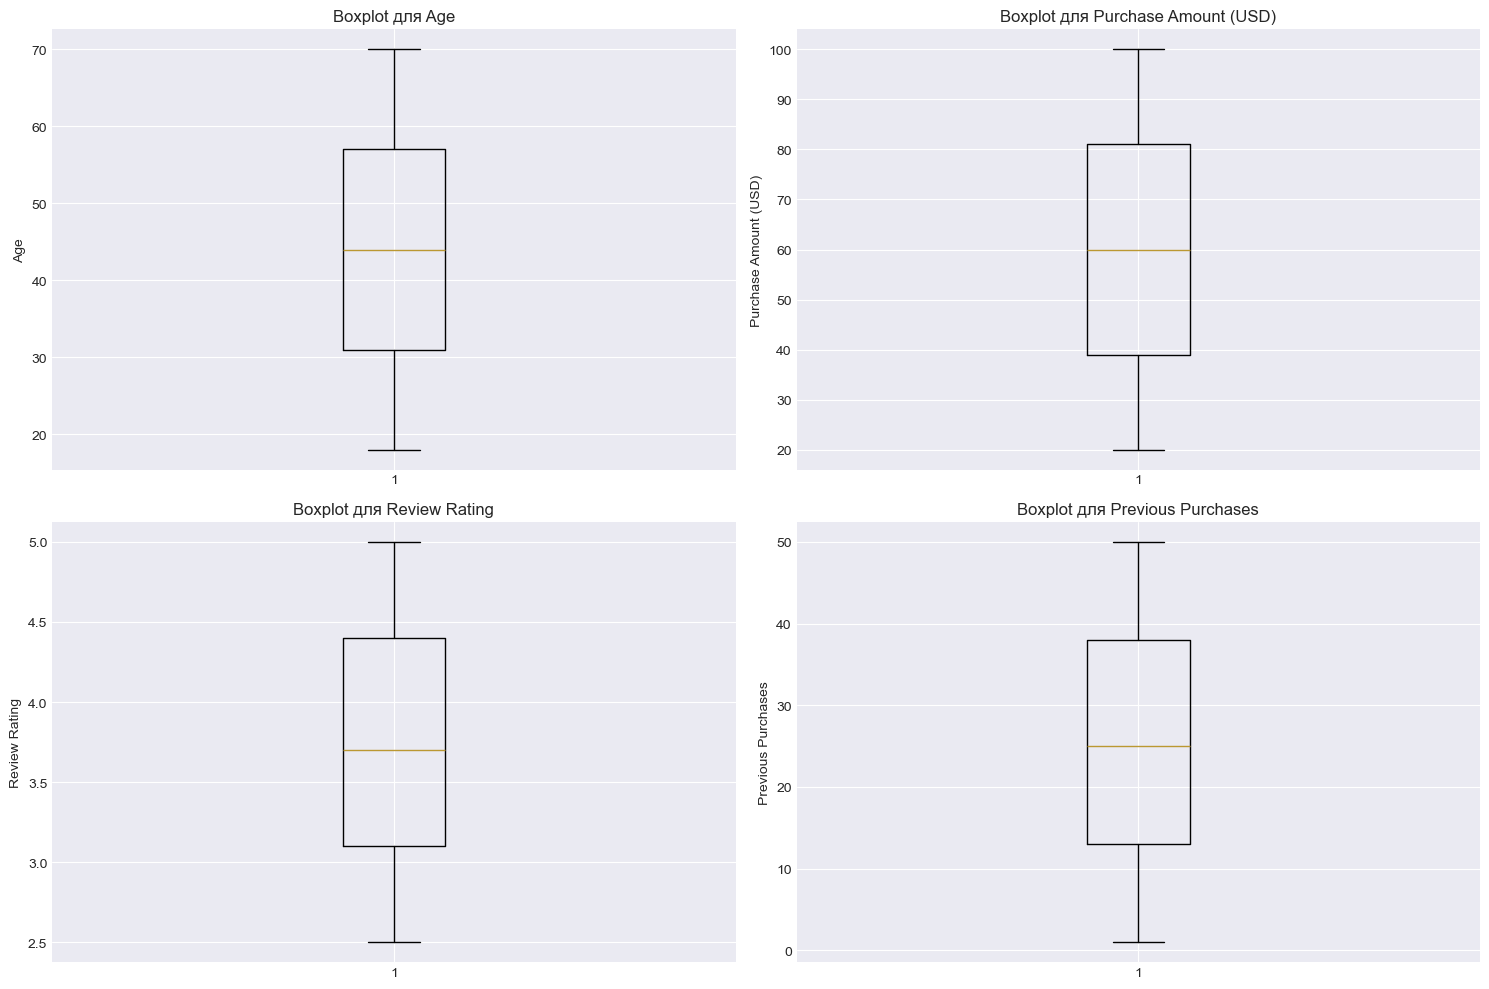

In [34]:
# Анализ выбросов для числовых столбцов
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Числовые столбцы:", list(numeric_cols))

# Функция для определения выбросов с помощью IQR
def detect_outliers_iqr(data):
    outliers = {}
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()
        outliers[col] = outliers_count
    return outliers

outliers_iqr = detect_outliers_iqr(df)
print("Выбросы по методу IQR:")
for col, count in outliers_iqr.items():
    if count > 0:
        print(f"{col}: {count} выбросов ({count/len(df)*100:.2f}%)")

# Визуализация выбросов для ключевых числовых столбцов
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

key_cols = ['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']
for idx, col in enumerate(key_cols[:4]):
    if col in df.columns:
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'Boxplot для {col}')
        axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()

In [35]:
print("Описательная статистика:")
df.describe()

Описательная статистика:


Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [36]:
# Уникальные значения для категориальных столбцов
categorical_cols = df.select_dtypes(include=['object']).columns
print("Категориальные столбцы и количество уникальных значений:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} уникальных значений")


Категориальные столбцы и количество уникальных значений:
Gender: 2 уникальных значений
Item Purchased: 25 уникальных значений
Category: 4 уникальных значений
Location: 50 уникальных значений
Size: 4 уникальных значений
Color: 25 уникальных значений
Season: 4 уникальных значений
Subscription Status: 2 уникальных значений
Shipping Type: 6 уникальных значений
Discount Applied: 2 уникальных значений
Promo Code Used: 2 уникальных значений
Payment Method: 6 уникальных значений
Frequency of Purchases: 7 уникальных значений


In [37]:
# Анализ распределения по категориям
print("\nТоп-5 самых частых значений в категориальных столбцах:")
for col in ['Category', 'Location', 'Season', 'Payment Method']:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts().head())



Топ-5 самых частых значений в категориальных столбцах:

Category:
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Location:
Location
Montana       96
California    95
Idaho         93
Illinois      92
Alabama       89
Name: count, dtype: int64

Season:
Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64

Payment Method:
Payment Method
PayPal         677
Credit Card    671
Cash           670
Debit Card     636
Venmo          634
Name: count, dtype: int64


In [38]:
# Корреляционный анализ
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

print("Корреляционная матрица:")
print(correlation_matrix)

Корреляционная матрица:
                       Customer ID       Age  Purchase Amount (USD)  \
Customer ID               1.000000 -0.004079               0.011048   
Age                      -0.004079  1.000000              -0.010424   
Purchase Amount (USD)     0.011048 -0.010424               1.000000   
Review Rating             0.001343 -0.021949               0.030776   
Previous Purchases       -0.039159  0.040445               0.008063   

                       Review Rating  Previous Purchases  
Customer ID                 0.001343           -0.039159  
Age                        -0.021949            0.040445  
Purchase Amount (USD)       0.030776            0.008063  
Review Rating               1.000000            0.004229  
Previous Purchases          0.004229            1.000000  


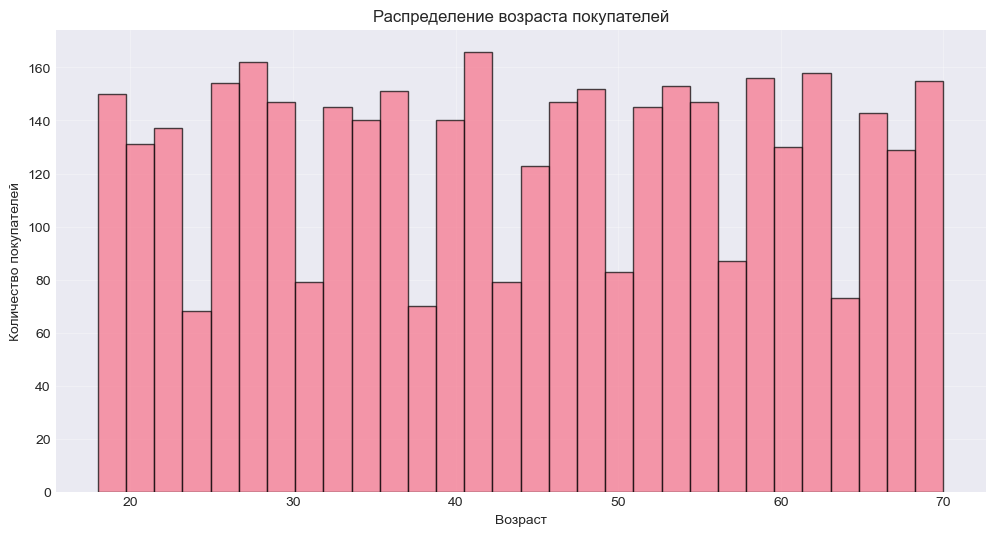

In [39]:
# 1. Гистограмма распределения возраста
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Распределение возраста покупателей')
plt.xlabel('Возраст')
plt.ylabel('Количество покупателей')
plt.grid(True, alpha=0.3)
plt.show()

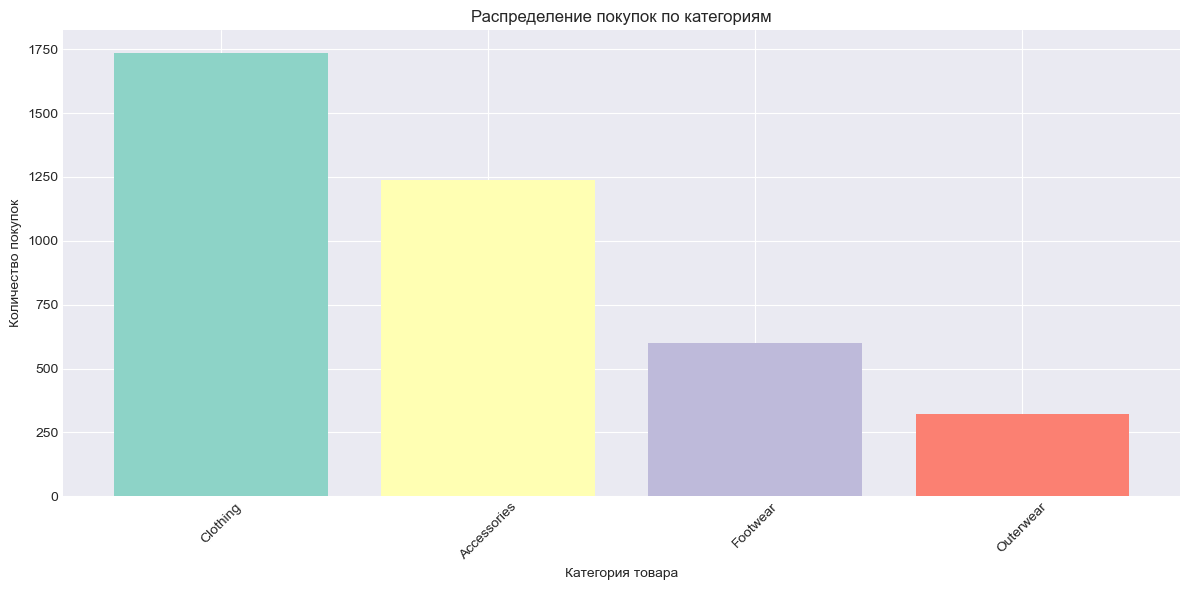

In [51]:
# 2. Распределение покупок по категориям
plt.figure(figsize=(12, 6))
category_counts = df['Category'].value_counts()
colors = plt.cm.Set3(np.arange(len(category_counts)))
bars = plt.bar(category_counts.index, category_counts.values, color=colors)
plt.title('Распределение покупок по категориям')
plt.xlabel('Категория товара')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45)
plt.tight_layout()

In [52]:
# Добавим значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.show()

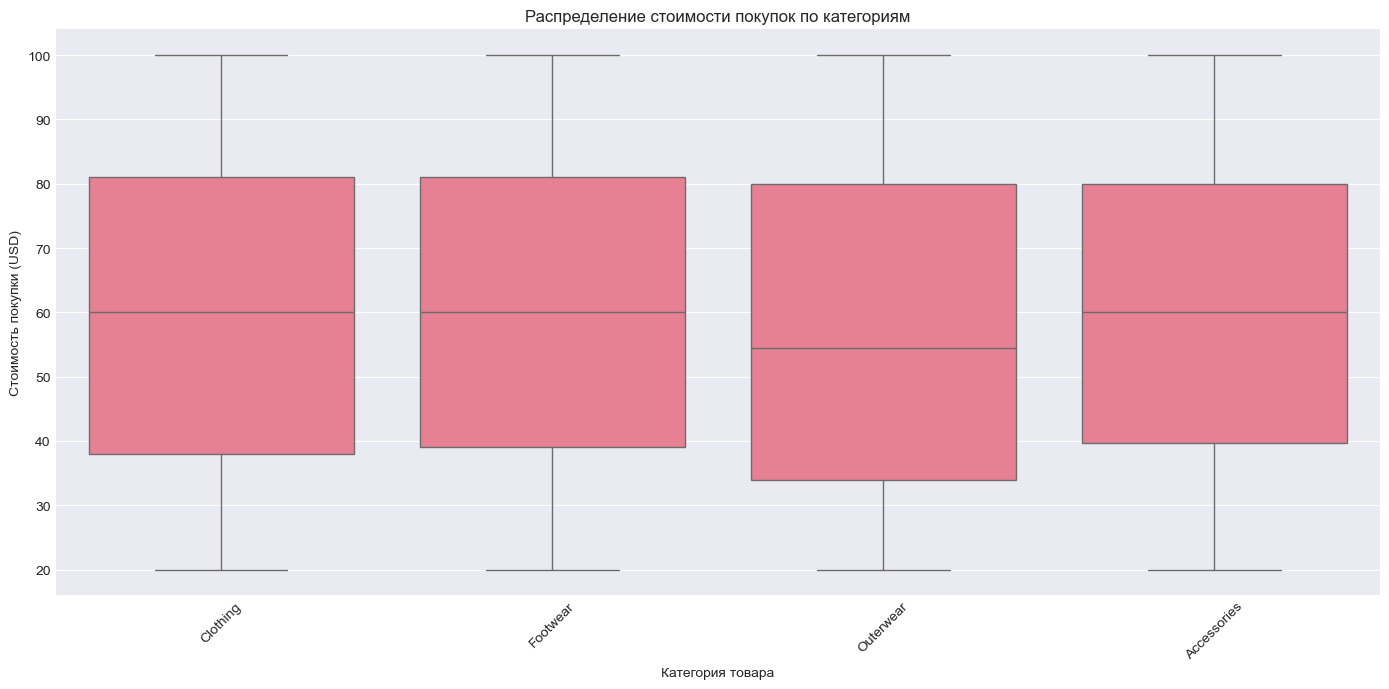

In [50]:

# 3. Boxplot стоимости покупок по категориям
plt.figure(figsize=(14, 7))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.title('Распределение стоимости покупок по категориям')
plt.xlabel('Категория товара')
plt.ylabel('Стоимость покупки (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


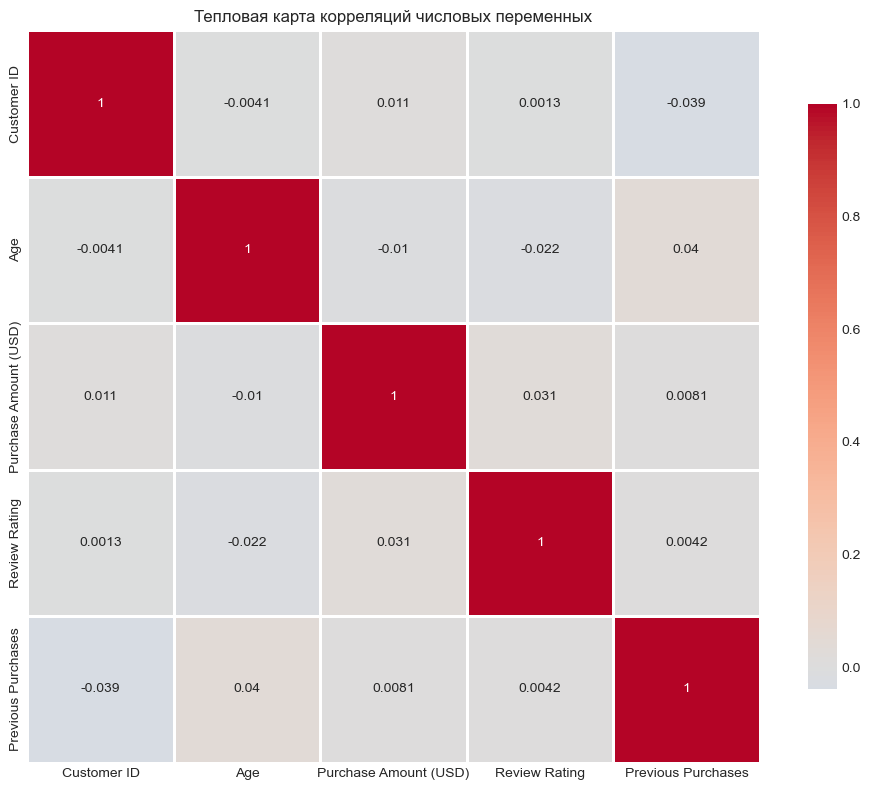

In [42]:
# 4. Heatmap корреляций
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": .8})
plt.title('Тепловая карта корреляций числовых переменных')
plt.tight_layout()
plt.show()


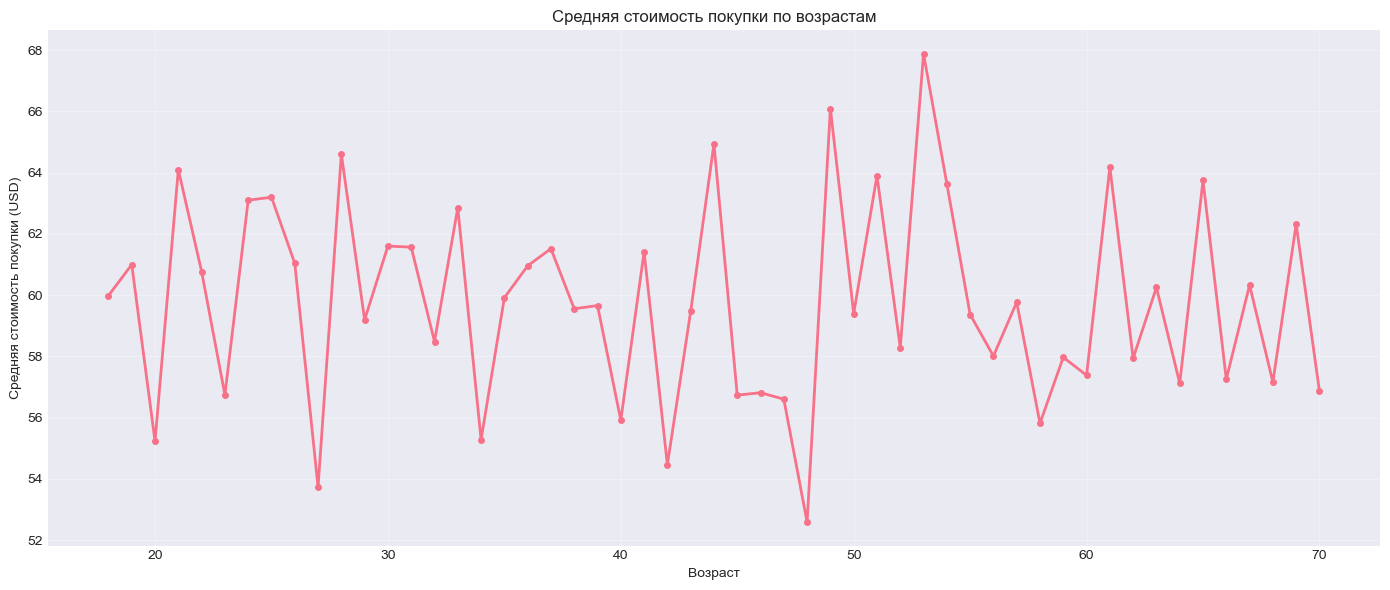

In [43]:
# 5. Линейный график: средняя стоимость покупки по возрастам
age_purchase = df.groupby('Age')['Purchase Amount (USD)'].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(age_purchase['Age'], age_purchase['Purchase Amount (USD)'], 
         marker='o', linewidth=2, markersize=4)
plt.title('Средняя стоимость покупки по возрастам')
plt.xlabel('Возраст')
plt.ylabel('Средняя стоимость покупки (USD)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

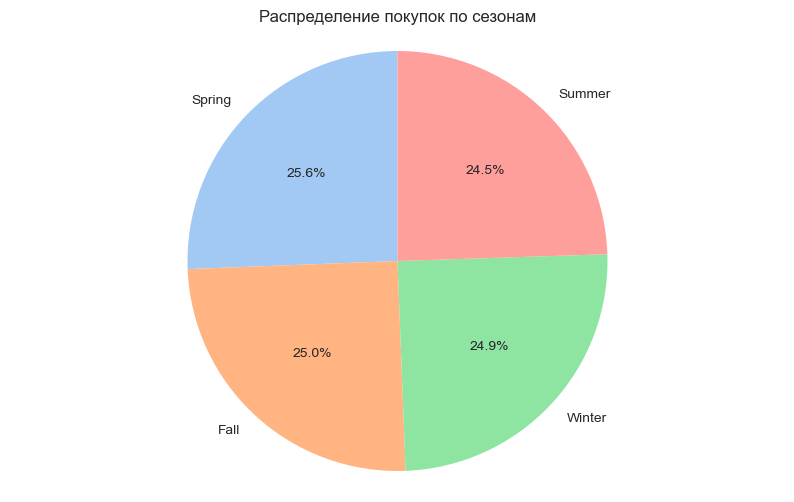

In [44]:
# 6. Дополнительная визуализация: распределение по сезонам
plt.figure(figsize=(10, 6))
season_counts = df['Season'].value_counts()
plt.pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('pastel'))
plt.title('Распределение покупок по сезонам')
plt.axis('equal')
plt.show()


Средняя стоимость покупки по категориям:
                  mean  median  count     sum
Category                                     
Footwear     60.255426    60.0    599   36093
Clothing     60.025331    60.0   1737  104264
Accessories  59.838710    60.0   1240   74200
Outerwear    57.172840    54.5    324   18524


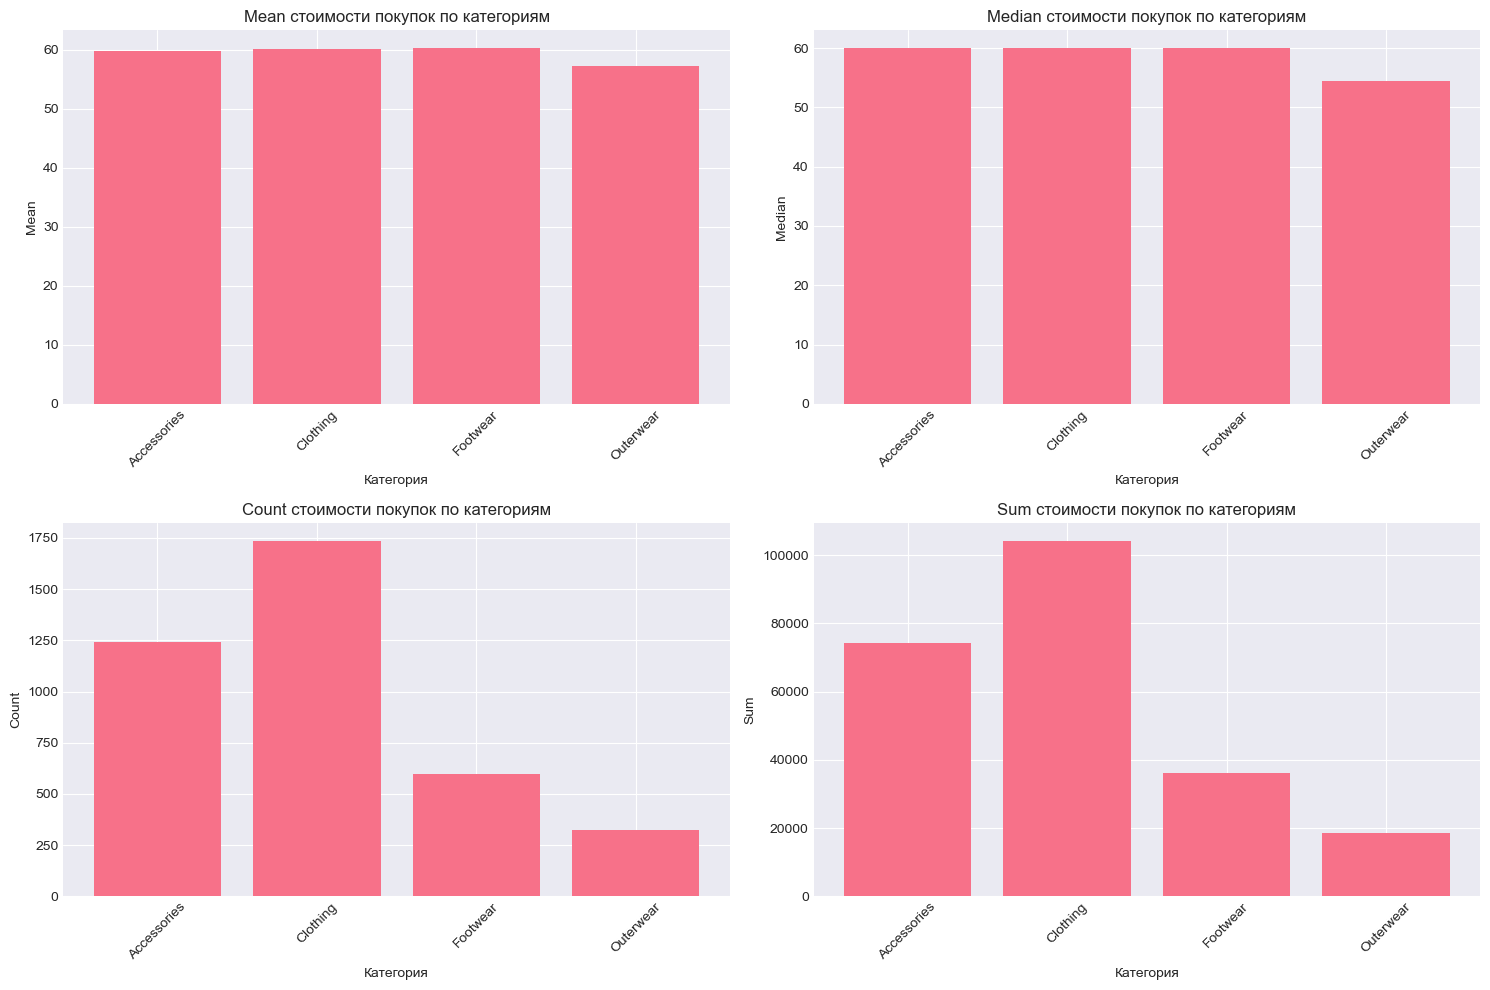

In [45]:
# Группировка 1: Средняя стоимость покупки по категориям
group1 = df.groupby('Category')['Purchase Amount (USD)'].agg(['mean', 'median', 'count', 'sum'])
print("Средняя стоимость покупки по категориям:")
print(group1.sort_values('mean', ascending=False))

# %%
# Визуализация группировки 1
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

metrics = ['mean', 'median', 'count', 'sum']
for idx, metric in enumerate(metrics):
    axes[idx].bar(group1.index, group1[metric])
    axes[idx].set_title(f'{metric.capitalize()} стоимости покупок по категориям')
    axes[idx].set_xlabel('Категория')
    axes[idx].set_ylabel(metric.capitalize())
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [46]:
# Группировка 2: Статистика по сезонам
group2 = df.groupby('Season').agg({
    'Purchase Amount (USD)': ['mean', 'sum', 'count'],
    'Review Rating': 'mean',
    'Age': 'mean'
})
print("\nСтатистика по сезонам:")
print(group2)



Статистика по сезонам:
       Purchase Amount (USD)              Review Rating        Age
                        mean    sum count          mean       mean
Season                                                            
Fall               61.556923  60018   975      3.729949  44.391795
Spring             58.737738  58679   999      3.790591  44.582583
Summer             58.405236  55777   955      3.725654  43.973822
Winter             60.357364  58607   971      3.752111  43.307930


In [47]:
# Группировка 3: Распределение по методам оплаты
group3 = df.groupby('Payment Method').agg({
    'Purchase Amount (USD)': ['mean', 'sum', 'count'],
    'Customer ID': 'nunique'
}).round(2)
print("\nСтатистика по методам оплаты:")
print(group3)



Статистика по методам оплаты:
               Purchase Amount (USD)              Customer ID
                                mean    sum count     nunique
Payment Method                                               
Bank Transfer                  59.71  36544   612         612
Cash                           59.70  40002   670         670
Credit Card                    60.07  40310   671         671
Debit Card                     60.92  38742   636         636
PayPal                         59.25  40109   677         677
Venmo                          58.95  37374   634         634



Статистика по возрастным группам:
          Purchase Amount (USD)              Review Rating Customer ID
                           mean    sum count          mean     nunique
Age Group                                                             
<18                       59.99   4139    69          3.74          69
18-30                     60.39  53140   880          3.80         880
30-40                     59.58  43193   725          3.75         725
40-50                     58.84  44129   750          3.73         750
50-60                     60.18  45316   753          3.70         753
60+                       59.70  43164   723          3.76         723


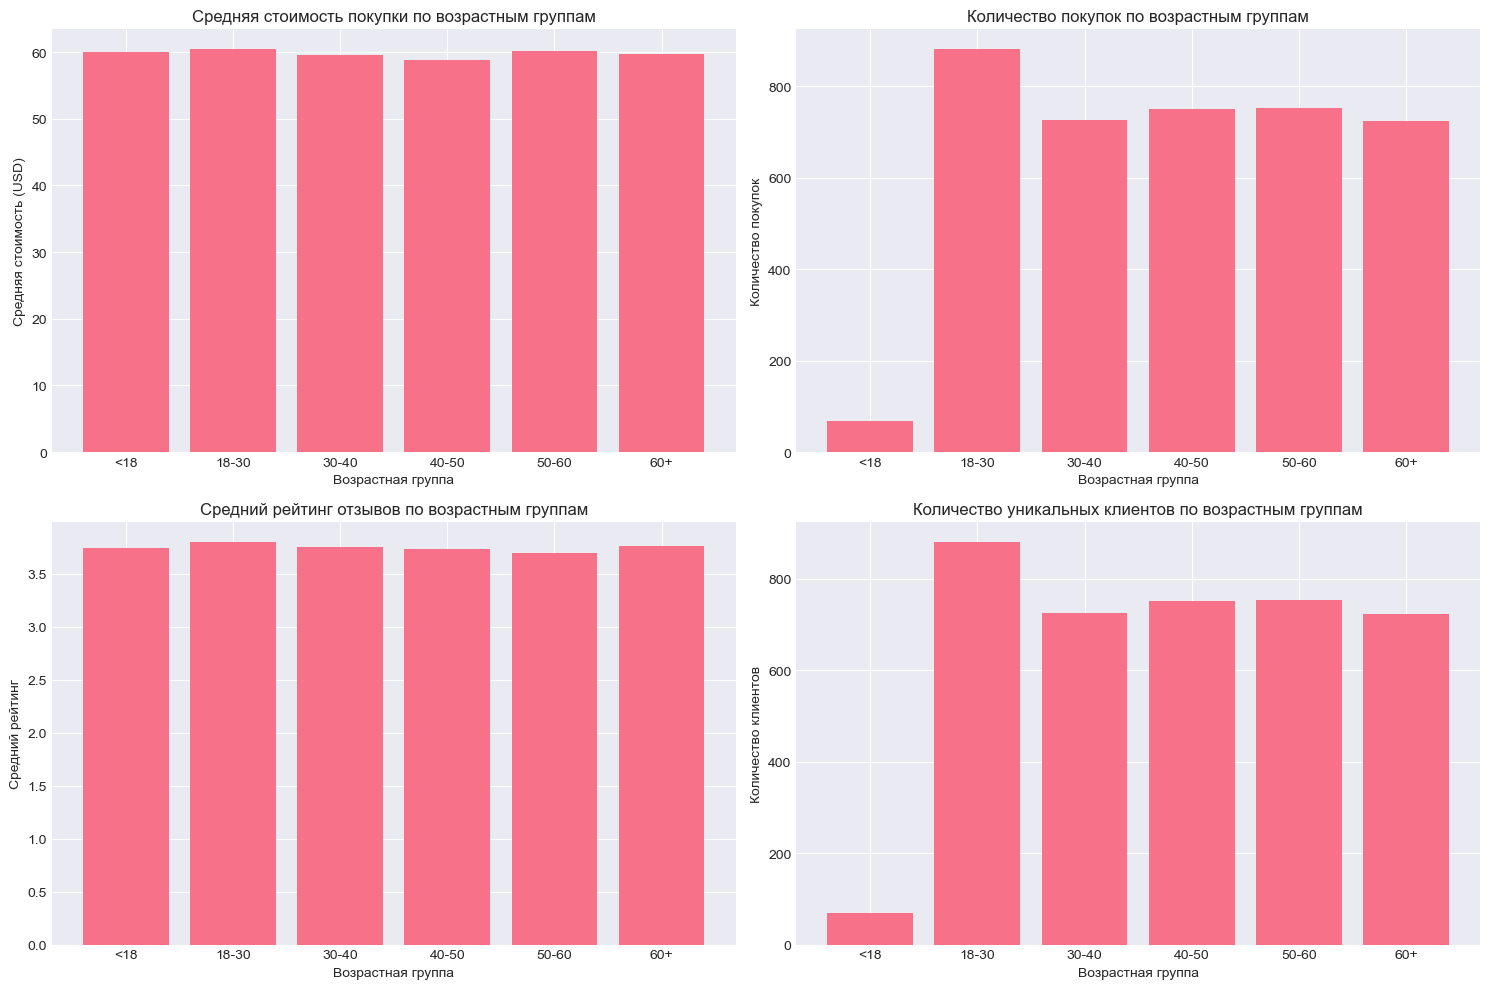


Сводная таблица: Категория × Сезон
                  mean                                     sum                \
Season            Fall     Spring     Summer     Winter   Fall Spring Summer   
Category                                                                       
Accessories  61.339506  56.501661  60.987179  60.366337  19874  17007  19028   
Clothing     61.405152  60.995595  56.563725  60.879464  26220  27692  23078   
Footwear     63.713235  58.619632  58.706250  60.571429   8665   9555   9393   
Outerwear    59.761364  54.629630  57.040000  57.025000   5259   4425   4278   

                   count                       
Season      Winter  Fall Spring Summer Winter  
Category                                       
Accessories  18291   324    301    312    303  
Clothing     27274   427    454    408    448  
Footwear      8480   136    163    160    140  
Outerwear     4562    88     81     75     80  


In [48]:
# Группировка 4: Возрастные группы
df['Age Group'] = pd.cut(df['Age'], 
                         bins=[0, 18, 30, 40, 50, 60, 100], 
                         labels=['<18', '18-30', '30-40', '40-50', '50-60', '60+'])

age_group_stats = df.groupby('Age Group').agg({
    'Purchase Amount (USD)': ['mean', 'sum', 'count'],
    'Review Rating': 'mean',
    'Customer ID': 'nunique'
}).round(2)
print("\nСтатистика по возрастным группам:")
print(age_group_stats)

# %%
# Визуализация возрастных групп
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Средняя стоимость покупки
axes[0].bar(age_group_stats.index, age_group_stats[('Purchase Amount (USD)', 'mean')])
axes[0].set_title('Средняя стоимость покупки по возрастным группам')
axes[0].set_xlabel('Возрастная группа')
axes[0].set_ylabel('Средняя стоимость (USD)')

# Количество покупок
axes[1].bar(age_group_stats.index, age_group_stats[('Purchase Amount (USD)', 'count')])
axes[1].set_title('Количество покупок по возрастным группам')
axes[1].set_xlabel('Возрастная группа')
axes[1].set_ylabel('Количество покупок')

# Средний рейтинг
axes[2].bar(age_group_stats.index, age_group_stats[('Review Rating', 'mean')])
axes[2].set_title('Средний рейтинг отзывов по возрастным группам')
axes[2].set_xlabel('Возрастная группа')
axes[2].set_ylabel('Средний рейтинг')

# Количество уникальных клиентов
axes[3].bar(age_group_stats.index, age_group_stats[('Customer ID', 'nunique')])
axes[3].set_title('Количество уникальных клиентов по возрастным группам')
axes[3].set_xlabel('Возрастная группа')
axes[3].set_ylabel('Количество клиентов')

plt.tight_layout()
plt.show()

# %%
# Сводная таблица (pivot table)
pivot_table = pd.pivot_table(df, 
                            values='Purchase Amount (USD)', 
                            index=['Category'], 
                            columns=['Season'], 
                            aggfunc=['mean', 'sum', 'count'],
                            fill_value=0)
print("\nСводная таблица: Категория × Сезон")
print(pivot_table)